In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset,DataLoader
import numpy as np
import os
import math
from numpy import random
from PIL import Image
import torchvision
from torchvision import transforms, datasets
from collections import OrderedDict
import glob

In [2]:
batch_size = 128

In [3]:
uses_device = torch.device('cuda:0' if torch.cuda.is_available() else "cpu")
print(uses_device)

cuda:0


In [4]:
class SuperResolutionNN(nn.Module):
    def __init__(self):
        super(SuperResolutionNN, self).__init__()
        self.layer = nn.Sequential(OrderedDict([
            ("conv1",nn.Conv2d(1,56,kernel_size=5,stride=1,padding=0)),
            ("PR1",nn.PReLU()),
            ("conv2",nn.Conv2d(56,12,1,1,0)),
            ("PR2",nn.PReLU()),
            ("conv3",nn.Conv2d(12,12,3,1,1)),
            ("PR3",nn.PReLU()),
            ("conv4",nn.Conv2d(12,12,3,1,1)),
            ("PR4",nn.PReLU()),
            ("conv5",nn.Conv2d(12,12,3,1,1)),
            ("PR5",nn.PReLU()),
            ("conv6",nn.Conv2d(12,12,3,1,1)),
            ("PR6",nn.PReLU()),
            ("conv7",nn.Conv2d(12,56,1,1,1)),
            ("PR7",nn.PReLU()),
            ("Deconv",nn.ConvTranspose2d(56,1,9,3,4))
        ]))
        nn.init.normal_(self.layer.conv1.weight, 0.0, 0.0378)
        nn.init.normal_(self.layer.conv2.weight, 0.0, 0.3536)
        nn.init.normal_(self.layer.conv3.weight, 0.0, 0.1179)
        nn.init.normal_(self.layer.conv4.weight, 0.0, 0.189)
        nn.init.normal_(self.layer.conv4.weight, 0.0, 0.0001)
    
    def forward(self,x,t=None, train=True):
        # :param x: 入力値
        # :param t: 正解のラベル
        # :param train: 学習かどうか
        out = self.layer(z)
        #損失か結果を返す
        #差の絶対値の平均(平均二乗誤差)
        return nn.MSELoss(out,t) if train else out

In [5]:
class MyDataset(torch.utils.data.Dataset):

    def __init__(self,path2label,transform=None):
        self.transform = transform
        self.path = path2label
    def __len__(self):
        return len(self.path)

    def __getitem__(self,idx):
        img = np.array(Image.open(list(self.path.keys())[idx]))/255.0
        img = cv2.resize(img,(300,300))
        label = list(self.path.values())[idx]
        if self.transform:
            img = self.transform(img)
        return img,label
        x_batch = []#正解データ
        y_batch = []#入力データ
        #高解像度データ
        hpix = np.array(idx,dtype=np.float32) /255.0
        y_batch.append([hpix[:,:,0]])
        
        #低解像度データ
        low = idx.resize((16,16),Image.NEAREST)
        lpix = (low, dtype=np.float32) / 255.0
        x_batch.append([lpix[:,:,0]])

In [6]:
# #データセットの呼び出し
# path_label=[]
# fp = os.listdir('/home/b20saito/DATASETS/anime-face-dataset/data/')
# #print(fp)
# for fn in fp:
#     img = Image.open('/home/b20saito/DATASETS/anime-face-dataset/data/' + fn).resize((320, 320)).convert('YCbCr')
#     path_label.append(img)

In [9]:
img_path = glob.glob('../../DATASETS/anime-face-dataset/data/*')
print(len(img_path))

19314


In [10]:
transform = transforms.Compose([transforms.ToTensor])
dataset = MyDataset(img_path, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True) #batch_size=128

In [11]:
model = SuperResolutionNN().to(uses_device)

In [12]:
optimizer = optim.Adam(model.parameters())

In [ ]:
for epoch ub range(10000):
    for i, data in enumerate(trau)

../../DATASETS/anime-face-dataset/data/20037.png


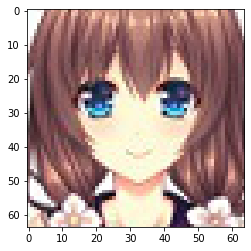

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
img = img_path[0]
print(img)
img = Image.open(img)
img = np.asarray(img)
plt.imshow(img)
plt.show()